# Pyber Challenge

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [5]:
# Left Merge the Data Frames
# (not seen: verified that there were no nulls, reviewed the data set, noted the data types)

# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


# Challenge 1: Summary DataFrame

In [6]:
# Get total rides for each city type
total_rides_by_type = pyber_data_df.groupby(["type"]).count() ["ride_id"]
total_rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [7]:
# Get total drivers for each city type
total_drivers_by_type = city_data_df.groupby(["type"]).sum() ["driver_count"]
total_drivers_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [8]:
# Get the total amount of fare for each city type
total_fare_by_type = pyber_data_df.groupby(["type"]).sum() ["fare"]
total_fare_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [9]:
# Get the average fare per ride for each city type
avg_fare_per_ride = total_fare_by_type / total_drivers_by_type
avg_fare_per_ride

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [10]:
# Get the average fare per driver for each city type
avg_fare_per_driver = total_fare_by_type / total_drivers_by_type
avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [11]:
# Create the Summary Table
summary = {
    "Total Rides" : total_rides_by_type,
    "Total Drivers" : total_drivers_by_type,
    "Total Fares" : total_fare_by_type,
    "Average Fare per Ride" : avg_fare_per_ride,
    "Average Fare per Driver" : avg_fare_per_driver
    
}
pyber_ride_summary_df = pd.DataFrame(summary)
pyber_ride_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,55.486282,55.486282
Suburban,625,490,19356.33,39.502714,39.502714
Urban,1625,2405,39854.38,16.571468,16.571468


In [12]:
# Remove the index name to improve look of table
pyber_ride_summary_df.index.name = ""
pyber_ride_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
,,,,,
Rural,125,78,4327.93,55.486282,55.486282
Suburban,625,490,19356.33,39.502714,39.502714
Urban,1625,2405,39854.38,16.571468,16.571468


In [13]:
# Format the columns
pyber_ride_summary_df["Total Rides"] = pyber_ride_summary_df["Total Rides"].map("{:,}".format)
pyber_ride_summary_df["Total Drivers"] = pyber_ride_summary_df["Total Drivers"].map("{:,}".format)
pyber_ride_summary_df["Total Fares"] = pyber_ride_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_ride_summary_df["Average Fare per Ride"] = pyber_ride_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_ride_summary_df["Average Fare per Driver"] = pyber_ride_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

In [14]:
# Output the Summary Data Frame
pyber_ride_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
,,,,,
Rural,125,78,"$4,327.93",$55.49,$55.49
Suburban,625,490,"$19,356.33",$39.50,$39.50
Urban,"1,625","2,405","$39,854.38",$16.57,$16.57


# Challenge 2: City Type Sum Fares Line Plot

In [15]:
# Rename Columns
pyber_data_df = pyber_data_df.rename(columns={
    "city" : "City",
    "date" : "Date",
    "fare" : "Fare",
    "ride_id" : "Ride ID",
    "driver_count" : "No. Drivers",
    "type" : "City Type"
})
pyber_data_df.head()

,City,Date,Fare,Ride ID,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
# Set the index to the "Date" column
pyber_data_df.set_index(pyber_data_df["Date"], inplace=True)
pyber_data_df.head()

,City,Date,Fare,Ride ID,No. Drivers,City Type
Date,,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
column_names = ["Date", "City Type", "Fare"]

In [18]:
# Make new df for fares and include only the Date, city type, and fare column
pyber_cities_fare = pyber_data_df[column_names].copy()
pyber_cities_fare.head()

,Date,City Type,Fare
Date,,,
2019-01-14 10:14:22,2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,2019-03-06 04:28:35,Urban,34.58


In [19]:
# Drop the extra columns
pyber_cities_fare.drop(["Date"], axis=1, inplace=True)

In [20]:
pyber_cities_fare.index = pd.to_datetime(pyber_data_df.index)
pyber_cities_fare.head()

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58


In [21]:
pyber_cities_fare.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [22]:
# Calculate the sum() of fares by the type of city and date using groupby() to create a Series.
sum_fare_by_type = pyber_cities_fare.groupby(["City Type", "Date"]).sum() ["Fare"]
sum_fare_by_type

City Type  Date               
Rural      2019-01-01 09:45:36    43.69
           2019-01-02 11:18:32    52.12
           2019-01-03 19:51:01    19.90
           2019-01-04 03:31:26    24.88
           2019-01-06 07:38:40    47.33
                                  ...  
Urban      2019-05-08 04:20:00    21.99
           2019-05-08 04:39:49    18.45
           2019-05-08 07:29:01    18.55
           2019-05-08 11:38:35    19.77
           2019-05-08 13:10:18    18.04
Name: Fare, Length: 2375, dtype: float64

In [23]:
# Convert the groupby Series into a DataFrame.
sum_fare_by_type = pyber_cities_fare.groupby(["City Type", "Date"]).sum() [["Fare"]]
sum_fare_by_type

Fare
City Type Date                      
Rural     2019-01-01 09:45:36  43.69
          2019-01-02 11:18:32  52.12
          2019-01-03 19:51:01  19.90
          2019-01-04 03:31:26  24.88
          2019-01-06 07:38:40  47.33
...                              ...
Urban     2019-05-08 04:20:00  21.99
          2019-05-08 04:39:49  18.45
          2019-05-08 07:29:01  18.55
          2019-05-08 11:38:35  19.77
          2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [24]:
# Reset the index, then create a pivot table DataFrame with the Date as the index and columns = 'City Type'. The Fare for each Date should appear in each row.
sum_fare_by_type = sum_fare_by_type.reset_index()
sum_fare_by_type

,City Type,Date,Fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [26]:
# create a pivot table with the date as the index and columns as the type with fare in each row
sum_fare_by_type_pivot = sum_fare_by_type.pivot(index="Date", columns="City Type") ["Fare"]
sum_fare_by_type_pivot.head()

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [27]:
sum_fare_by_type_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2 KB


In [28]:
# Create a line chart that shows fares from 1 Jan to 29 April 2018
fare_jan_april = sum_fare_by_type_pivot.loc['2019-01-01': '2019-04-29']
fare_jan_april.head(20)

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [29]:
# create a new df and use resample by week to get sum of fares for each week
weekly_fares_df = fare_jan_april.resample("W").sum()
weekly_fares_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


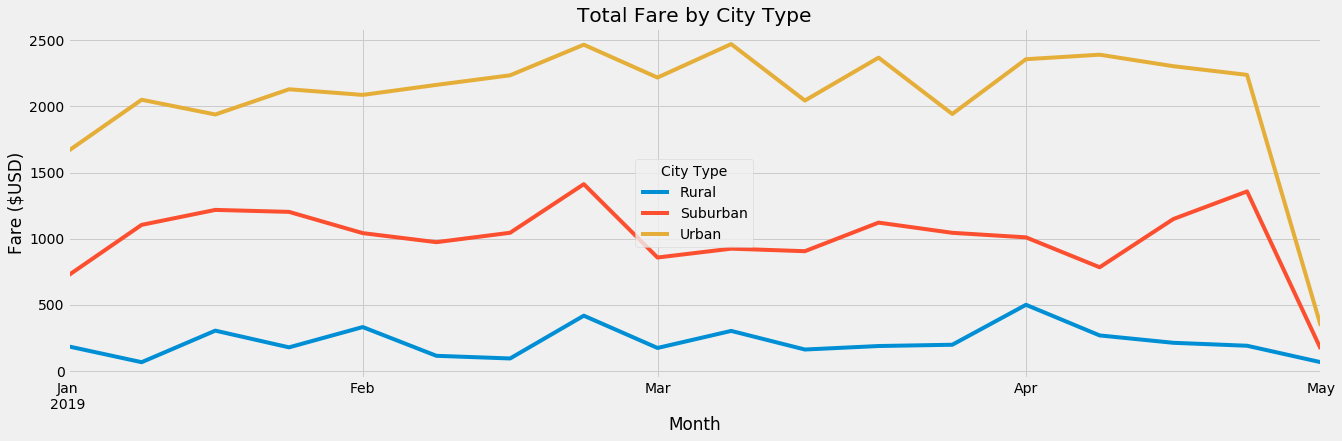

In [34]:
#Use axes plotting to add labels and titles
from matplotlib import style
style.use("fivethirtyeight")
ax = weekly_fares_df.plot(figsize=(20,6))
#add a title
ax.set_title("Total Fare by City Type")
#Add x and y axis label
ax.set_xlabel("Month")
ax.set_ylabel("Fare ($USD)")
plt.savefig("./Challenge_fare_summary.png")
plt.show()